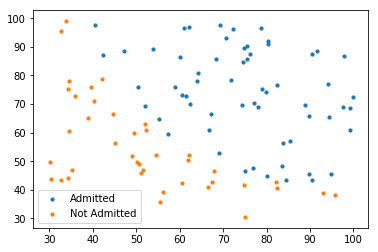

In [58]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# load the data from the file
data = pd.read_csv("c:/users/hp/downloads/marks4.csv")
data.head()
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()
    
    

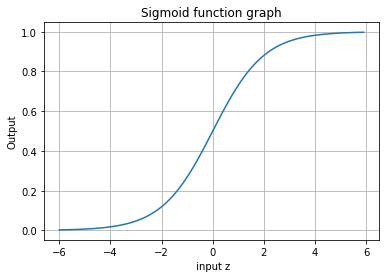

In [5]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-6, 6, 0.1);
sigmoid = 1/(1+np.exp(-z));
fig = plt.figure('Cost function convergence')
plt.plot(z,sigmoid)
plt.grid(True)
plt.xlabel(' input z')
plt.ylabel('Output')
plt.title('Sigmoid function graph')
plt.show()

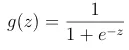

#g(z) = 1/1+e^-z
Types of Logistic Regression
Types of Logistic Regression:

Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

In [59]:
data = pd.read_csv("c:/users/hp/downloads/marks4.csv", None)
data.head()
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target values, last column of the data frame
y = data.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [60]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

34.52451385320009


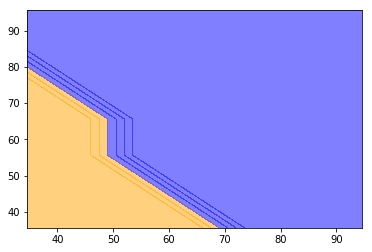

In [70]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
#print(X_set["exam_1"].min())
aranged_ages = np.arange(start = X_set["exam_1"].min(), stop = X_set["exam_1"].max(), step = 10)
aranged_salaries = np.arange(start = X_set["exam_2"].min(), stop = X_set["exam_2"].max(), step =10)

X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

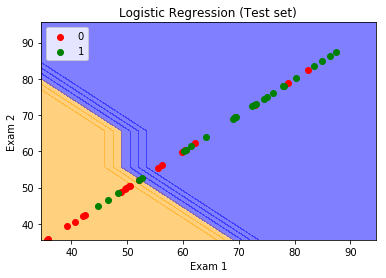

In [82]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
#print(X_set["exam_1"].min())
aranged_e1 = np.arange(start = X_set["exam_1"].min(), stop = X_set["exam_1"].max(), step = 10)
aranged_e2 = np.arange(start = X_set["exam_2"].min(), stop = X_set["exam_2"].max(), step =10)

X1, X2 = np.meshgrid(aranged_e1, aranged_e2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

#print(X.loc[0])
#print(X.loc[1])
#print(X_set[y_set == 1])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j], X_set[y_set == i], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.show()

In [83]:
import statsmodels.api as sm

glm_binom = sm.GLM(X, y, family=sm.families.Binomial())

In [87]:
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['exam_1', 'exam_2']   No. Observations:                  100
Model:                              GLM   Df Residuals:                       99
Model Family:                  Binomial   Df Model:                            0
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -553.19
Date:                  Fri, 08 Feb 2019   Deviance:                       579.53
Time:                          21:37:39   Pearson chi2:                     568.
No. Iterations:                       3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
admitted       0.0103      0.021      0.484      0.628      -0.031       0.052
